# **BTC TSA**

# **ARIMA**

In [1]:
!pip uninstall pmdarima -y
!pip install pmdarima --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.3 MB/s eta 0:00:00


In [1]:
from google.colab import files

# Upload your cleaned CSV file (choose one at a time)
uploaded = files.upload()


Saving cleaned_btc_data.csv to cleaned_btc_data.csv


In [3]:
%pip install numpy==1.26.4

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

print("✅ All imports are now working fine!")


✅ All imports are now working fine!


In [5]:
btc = pd.read_csv("/content/cleaned_btc_data.csv")

In [6]:
# Set date as index
btc.set_index('Date', inplace=True)

# Use the 'Close' column for forecasting
btc_close = btc['Close']

# Split data into training and testing (e.g., 90% train, 10% test)
train_size = int(len(btc_close) * 0.9)
train, test = btc_close[0:train_size], btc_close[train_size:]

In [7]:
# Auto ARIMA to find best parameters
model_auto = auto_arima(train, seasonal=False, trace=True)
print(model_auto.summary())

# Fit ARIMA model
model = ARIMA(train, order=model_auto.order)
model_fit = model.fit()

# Forecast the next len(test) points
forecast = model_fit.forecast(steps=len(test))

# Calculate error
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5854.901, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5847.132, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5848.911, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5848.920, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5847.890, Time=0.02 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5850.908, Time=0.30 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.296 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  329
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2921.566
Date:                Fri, 07 Nov 2025   AIC                           5847.132
Time:                        06:48:49   BIC                           5854.718
Sample:                    01-01-2024   HQIC                          5850.158
                         - 11-24-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    164.1661    102.872      1.596      0.111     -37.460 

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


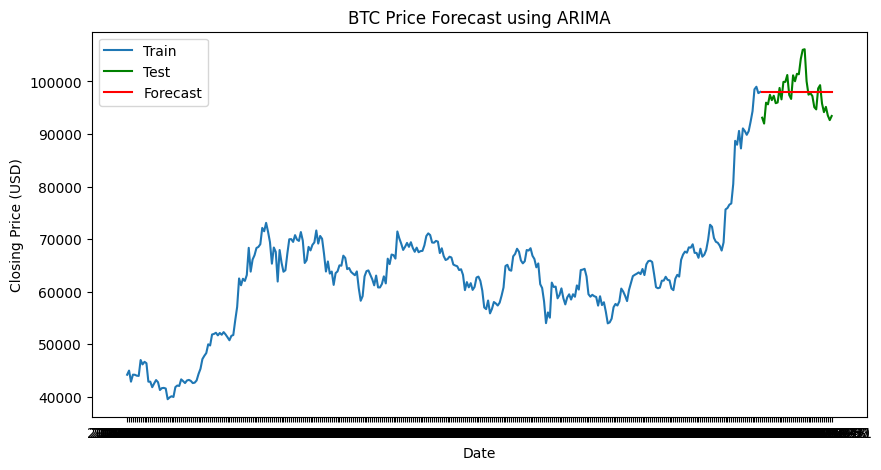

In [8]:
# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('BTC Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

# **SARIMA**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving cleaned_btc_data.csv to cleaned_btc_data (4).csv


In [9]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

In [10]:
btc = pd.read_csv("/content/cleaned_btc_data.csv")   # or path where you uploaded file
btc['Date'] = pd.to_datetime(btc['Date'])
btc = btc.sort_values('Date').reset_index(drop=True)

btc.set_index('Date', inplace=True)
# If your data has missing days and you want to ensure daily frequency:
btc = btc.asfreq('D')            # inserts NaN for missing dates
btc['Close'] = btc['Close'].interpolate()   # simple interpolation to fill holes (optional)


In [11]:
series = btc['Close'].astype(float)

train_size = int(len(series) * 0.9)
train, test = series.iloc[:train_size], series.iloc[train_size:]

print(f"Total points: {len(series)}, Train: {len(train)}, Test: {len(test)}")
m = 7

print("Running auto_arima to suggest orders (this may take a minute)...")
auto_model = auto_arima(train,
                        seasonal=True,
                        m=m,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True,
                        max_p=5, max_q=5, max_P=2, max_Q=2)

print("\nAuto ARIMA summary:")
print(auto_model.summary())

order = auto_model.order
seasonal_order = auto_model.seasonal_order
print("Selected order:", order)
print("Selected seasonal_order:", seasonal_order)

# ---Fit SARIMAX using statsmodels for richer output ---
model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())

# ---Forecast on test set length and compute error ---
n_test = len(test)
forecast_result = model_fit.get_forecast(steps=n_test)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int(alpha=0.05)

# Evaluation
rmse = sqrt(mean_squared_error(test, forecast))
print(f"Test RMSE: {rmse:.4f}")

Total points: 366, Train: 329, Test: 37
Running auto_arima to suggest orders (this may take a minute)...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=5854.178, Time=3.29 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5847.132, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5848.200, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5848.459, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5847.890, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=5846.299, Time=0.08 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=5846.652, Time=0.18 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=5847.997, Time=0.23 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=5846.553, Time=0.08 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=5842.562, Time=0.56 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=5844.561, Time=1.10 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=5842.700, Time=0.50 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=5844.232, Time=0.6

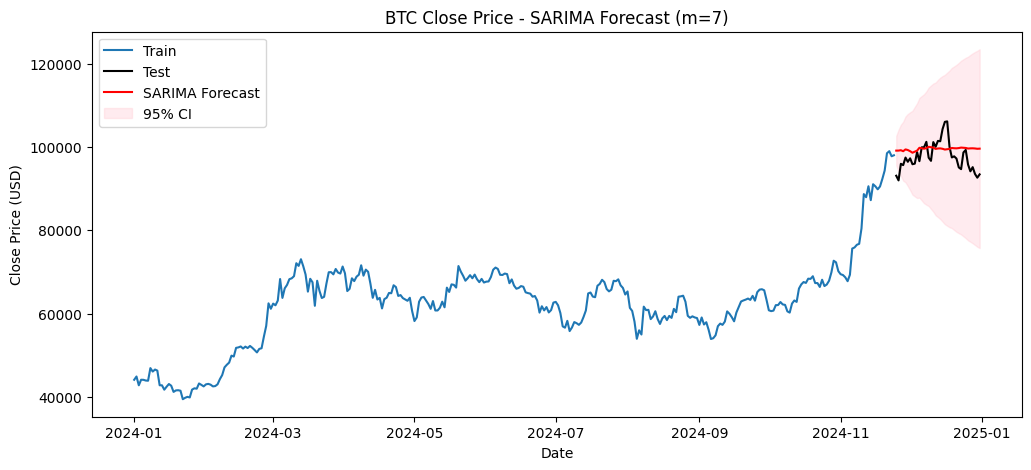

In [12]:
# --- 8) Plot train / test / forecast with confidence intervals ---
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='black')
plt.plot(forecast.index, forecast, label='SARIMA Forecast', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3, label='95% CI')
plt.title(f'BTC Close Price - SARIMA Forecast (m={m})')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

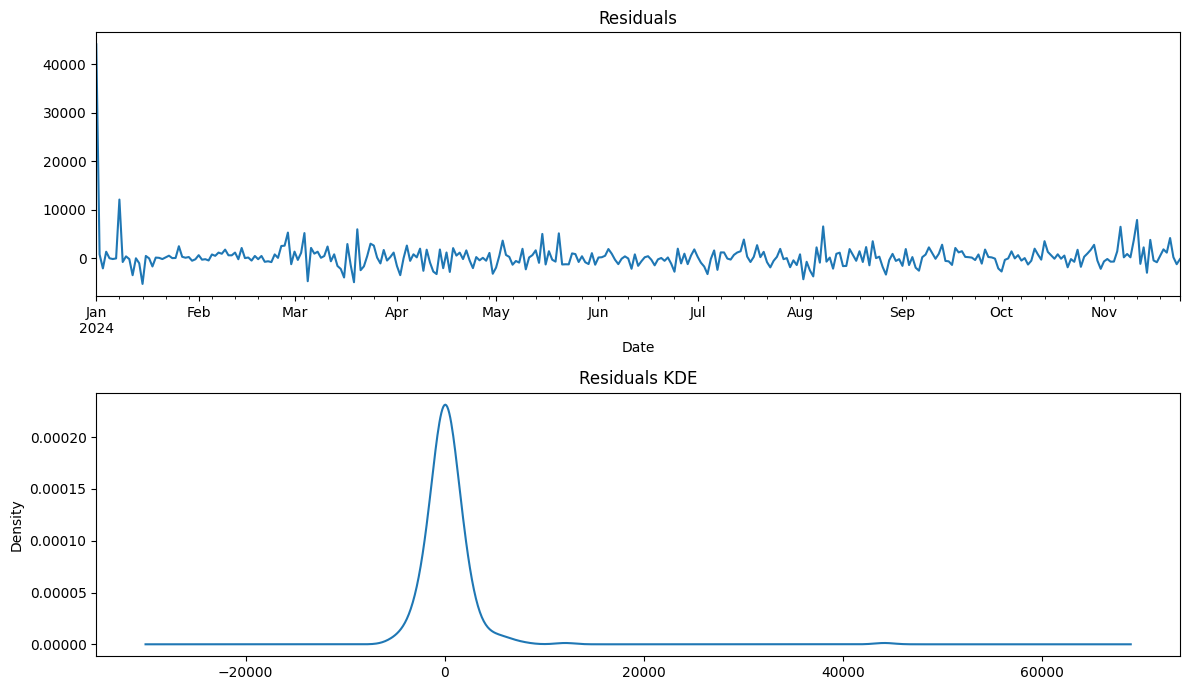

In [13]:
# --- 9) Residual diagnostics (quick) ---
residuals = model_fit.resid
fig, ax = plt.subplots(2,1, figsize=(12,7))
residuals.plot(ax=ax[0], title='Residuals')
residuals.plot(kind='kde', ax=ax[1], title='Residuals KDE')
plt.tight_layout()
plt.show()

In [14]:
# Optionally run Ljung-Box test to check residual autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals.dropna(), lags=[10], return_df=True)
print("Ljung-Box test (lag=10):")
print(lb_test)

# --- 10) Forecast future days (e.g., next 30 days) and save to CSV ---
future_days = 30
future_result = model_fit.get_forecast(steps=future_days)
future_forecast = future_result.predicted_mean
future_conf_int = future_result.conf_int()

future_df = pd.DataFrame({
    'Date': future_forecast.index,
    'Forecast': future_forecast.values,
    'Lower_CI': future_conf_int.iloc[:,0].values,
    'Upper_CI': future_conf_int.iloc[:,1].values
})
future_df.set_index('Date', inplace=True)
future_df.to_csv("btc_sarima_future_30days.csv")
print("Saved forecast for next", future_days, "days to 'btc_sarima_future_30days.csv'")

# Show top of forecast
display(future_df.head())

Ljung-Box test (lag=10):
     lb_stat  lb_pvalue
10  7.782543   0.650068
Saved forecast for next 30 days to 'btc_sarima_future_30days.csv'


,Forecast,Lower_CI,Upper_CI
Date,,,
2024-11-25,99128.678567,95599.297826,102658.059308
2024-11-26,99135.967067,94144.668957,104127.265178
2024-11-27,99223.207925,93110.141163,105336.274688
2024-11-28,98989.571737,91930.810255,106048.333219
2024-11-29,99420.015051,91528.079796,107311.950306


# **Prophet**

In [23]:
%pip uninstall prophet pystan cmdstanpy -y
# Fresh, compatible install
%pip install prophet cmdstanpy --quiet


Found existing installation: prophet 1.1.7
Uninstalling prophet-1.1.7:
  Successfully uninstalled prophet-1.1.7
Found existing installation: cmdstanpy 1.3.0
Uninstalling cmdstanpy-1.3.0:
  Successfully uninstalled cmdstanpy-1.3.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.6 MB/s eta 0:00:00


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

print("✅ Prophet backend OK")

✅ Prophet backend OK


In [18]:
# 2️⃣ Load your cleaned BTC data
btc = pd.read_csv("/content/cleaned_btc_data.csv")
btc['Date'] = pd.to_datetime(btc['Date'])
btc = btc.sort_values('Date')

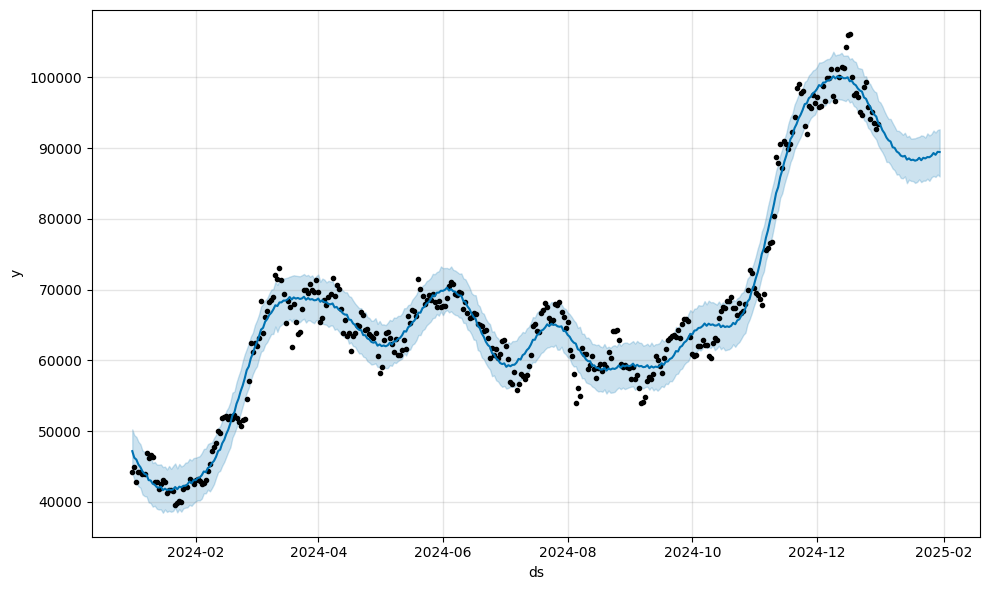

In [26]:
btc = pd.read_csv("/content/cleaned_btc_data.csv")
btc['Date'] = pd.to_datetime(btc['Date'])
btc = btc.sort_values('Date')
prophet_df = btc[['Date','Close']].rename(columns={'Date':'ds','Close':'y'})
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(prophet_df)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
model.plot(forecast)
plt.show()

In [27]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("btc_prophet_forecast_30days.csv", index=False)
print("✅ Prophet forecast saved to 'btc_prophet_forecast_30days.csv'")

✅ Prophet forecast saved to 'btc_prophet_forecast_30days.csv'


# LSTM

In [28]:
# 1️⃣ Install required libs (only if missing)
%pip install tensorflow scikit-learn --quiet

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [32]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [33]:
pip install tensorflow


In [34]:
btc = pd.read_csv("/content/cleaned_btc_data.csv")
btc['Date'] = pd.to_datetime(btc['Date'])
btc = btc.sort_values('Date')

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0985
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0139
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0098
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0083
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0062
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0058
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0050
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0041
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0040
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0034
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0030
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029
Epoc

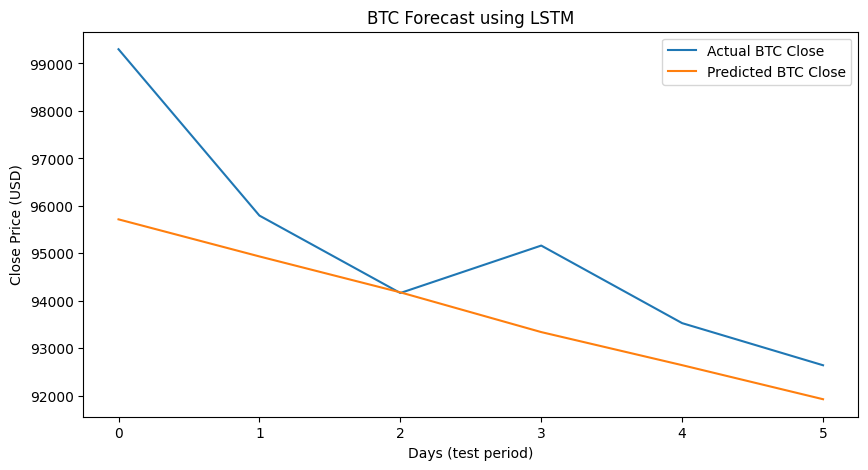

In [35]:
# 3️⃣ Use Close prices and scale them between 0–1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(np.array(btc['Close']).reshape(-1,1))

# 4️⃣ Create training and test sets
train_size = int(len(scaled_close) * 0.9)
train_data, test_data = scaled_close[:train_size], scaled_close[train_size:]

# 5️⃣ Function to create (X, y) sequences
def create_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 30  # use past 30 days to predict next day
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape inputs to [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 6️⃣ Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step,1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 7️⃣ Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# 8️⃣ Predict
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# 9️⃣ Inverse transform to get real prices
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
actual_test = scaler.inverse_transform(y_test.reshape(-1,1))

# 10️⃣ Plot results
plt.figure(figsize=(10,5))
plt.plot(actual_test, label='Actual BTC Close')
plt.plot(test_pred, label='Predicted BTC Close')
plt.title('BTC Forecast using LSTM')
plt.xlabel('Days (test period)')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()